In [106]:
import pandas as pd

In [117]:
data = pd.read_csv('/Users/julianlink/Documents/Uni/3. Semester/ADLM/adlm-lung-cancer/data/dataset_all.csv')
data.drop_duplicates(subset='patient_id', keep='first', inplace=True)
print(data.shape)
data.head()

(2393, 18)


,patient_id,timepoint,original_image,nodule_path,age,educat,ethnic,gender,race,diagcopd,height,weight,smokeage,pkyr,smokeday,smokeyr,cigsmok,lung_cancer
0,101706,T0,/local_ssd/practical_wise24/lung_cancer/prasan...,/local_ssd/practical_wise24/lung_cancer/adlm-l...,70,5,2,2,1,0.0,60.0,127.0,40.0,36.0,40,18,0,0
1,101363,T0,/local_ssd/practical_wise24/lung_cancer/prasan...,/local_ssd/practical_wise24/lung_cancer/adlm-l...,71,7,2,1,1,0.0,72.0,240.0,14.0,52.0,20,52,0,0
4,102604,T2,/local_ssd/practical_wise24/lung_cancer/prasan...,/local_ssd/practical_wise24/lung_cancer/adlm-l...,69,2,2,1,1,0.0,70.0,300.0,17.0,50.0,20,50,0,0
7,100945,T1,/local_ssd/practical_wise24/lung_cancer/prasan...,/local_ssd/practical_wise24/lung_cancer/adlm-l...,70,7,2,1,1,0.0,72.0,255.0,16.0,160.0,80,40,0,0
10,100002,T2,/local_ssd/practical_wise24/lung_cancer/prasan...,/local_ssd/practical_wise24/lung_cancer/adlm-l...,66,3,2,1,1,0.0,68.0,175.0,14.0,52.0,20,52,1,0


In [118]:
data['ethnic'] = data['ethnic'].map({
    1: "Hispanic or Latino",
    2: "Neither Hispanic nor Latino",
    7: "Participant refused to answer",
    95: "Missing data form - form is not expected to ever be completed",
    98: "Missing - form was submitted and the answer was left blank",
    99: "Unknown"
})

data['race'] = data['race'].map({
    1: "White",
    2: "Black or African-American",
    3: "Asian",
    4: "American Indian or Alaskan Native",
    5: "Native Hawaiian or Other Pacific Islander",
    6: "More than one race",
    7: "Participant refused to answer",
    95: "Missing data form - form is not expected to ever be completed",
    96: "Missing - no response",
    98: "Missing - form was submitted and the answer was left blank",
    99: "Unknown"
})


data['gender'] = data['gender'].map({
    1: "male",
    2: "female",
})

data['cigsmok'] = data['cigsmok'].map({
    0: 'not',
    1: ''
})


In [119]:
data.head()

,patient_id,timepoint,original_image,nodule_path,age,educat,ethnic,gender,race,diagcopd,height,weight,smokeage,pkyr,smokeday,smokeyr,cigsmok,lung_cancer
0,101706,T0,/local_ssd/practical_wise24/lung_cancer/prasan...,/local_ssd/practical_wise24/lung_cancer/adlm-l...,70,5,Neither Hispanic nor Latino,female,White,0.0,60.0,127.0,40.0,36.0,40,18,not,0
1,101363,T0,/local_ssd/practical_wise24/lung_cancer/prasan...,/local_ssd/practical_wise24/lung_cancer/adlm-l...,71,7,Neither Hispanic nor Latino,male,White,0.0,72.0,240.0,14.0,52.0,20,52,not,0
4,102604,T2,/local_ssd/practical_wise24/lung_cancer/prasan...,/local_ssd/practical_wise24/lung_cancer/adlm-l...,69,2,Neither Hispanic nor Latino,male,White,0.0,70.0,300.0,17.0,50.0,20,50,not,0
7,100945,T1,/local_ssd/practical_wise24/lung_cancer/prasan...,/local_ssd/practical_wise24/lung_cancer/adlm-l...,70,7,Neither Hispanic nor Latino,male,White,0.0,72.0,255.0,16.0,160.0,80,40,not,0
10,100002,T2,/local_ssd/practical_wise24/lung_cancer/prasan...,/local_ssd/practical_wise24/lung_cancer/adlm-l...,66,3,Neither Hispanic nor Latino,male,White,0.0,68.0,175.0,14.0,52.0,20,52,,0


In [120]:
def templatize(age, educat, ethnic, gender, height, weight, pkyr, smokeyr, smokeage, smokeday, cigsmok):
    template = f"The patient is {age} years old, has {educat} years of education, belongs to ethnic group {ethnic}, is {gender} gender, and has a height of {height} inches and weight of {weight} pounds. The patient has a history of {pkyr} package years of smoking and has smoked for {smokeyr} years. The patient started smoking at {smokeage} years and smokes an average of {smokeday} cigarettes per day. At the time of the trial the patient was {cigsmok} smoking."

    return template

def templatize_no_gender(age, educat, ethnic, height, weight, pkyr, smokeyr, smokeage, smokeday, cigsmok):
    template = f"The patient is {age} years old, has {educat} years of education, belongs to ethnic group {ethnic}, and has a height of {height} inches and weight of {weight} pounds. The patient has a history of {pkyr} package years of smoking and has smoked for {smokeyr} years. The patient started smoking at {smokeage} years and smokes an average of {smokeday} cigarettes per day. At the time of the trial the patient was {cigsmok} smoking."

    return template

In [ ]:
end_index = 2

for i, row in data.iterrows():
    if i == end_index:
        break
    
    age = row['age']
    educat = row['educat']
    ethnic = row['ethnic']
    gender = row['gender']
    height = row['height']
    weight = row['weight']
    pkyr = row['pkyr']
    smokeyr = row['smokeyr']
    smokeage = row['smokeage']
    smokeday = row['smokeday']
    cigsmok = row['cigsmok']

    # embedding_sentence = templatize(age, educat, ethnic, gender, height, weight, pkyr, smokeyr, smokeage, smokeday, cigsmok)
    embedding_sentence = templatize_no_gender(age, educat, ethnic, height, weight, pkyr, smokeyr, smokeage, smokeday, cigsmok)

    print(embedding_sentence)


In [122]:
from openai import OpenAI
import json

client = OpenAI()

embeddings = []

# end_index = 200

for i, row in data.iterrows():
    # if i == end_index:
    #     break
    age = row['age']
    educat = row['educat']
    ethnic = row['ethnic']
    gender = row['gender']
    height = row['height']
    weight = row['weight']
    pkyr = row['pkyr']
    smokeyr = row['smokeyr']
    smokeage = row['smokeage']
    smokeday = row['smokeday']
    cigsmok = row['cigsmok']

    # embedding_sentence = templatize(age, educat, ethnic, gender, height, weight, pkyr, smokeyr, smokeage, smokeday, cigsmok)
    embedding_sentence = templatize_no_gender(age, educat, ethnic, height, weight, pkyr, smokeyr, smokeage, smokeday, cigsmok)

    response = client.embeddings.create(
        input=embedding_sentence,
        model="text-embedding-3-small"
    )

    embeddings.append(response.data[0].embedding)


with open('embeddings_no_gender_unique.json', 'w') as f:
    json.dump(embeddings, f)

KeyboardInterrupt: 

In [108]:
with open('embeddings_no_gender.json', 'r') as f:
    data_j = json.load(f)
    print(len(data_j))
    print(len(data_j[0]))

5754
1536


In [109]:
df = pd.DataFrame(data_j)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,0.032180,-0.034982,0.027041,0.041289,-0.012346,0.014987,0.015065,-0.005213,0.010127,-0.012872,...,-0.001082,-0.022500,-0.013008,-0.004837,0.016375,0.003396,0.000865,-0.025290,-0.038719,-0.018438
1,0.033155,-0.040217,0.029235,0.027911,-0.017409,0.009548,0.013722,-0.007627,0.003570,-0.011606,...,-0.006024,-0.038114,-0.008029,0.004596,0.007932,0.004368,-0.003177,-0.029962,-0.042710,-0.022718
2,0.033155,-0.040217,0.029235,0.027911,-0.017409,0.009548,0.013722,-0.007627,0.003570,-0.011606,...,-0.006024,-0.038114,-0.008029,0.004596,0.007932,0.004368,-0.003177,-0.029962,-0.042710,-0.022718
3,0.033155,-0.040217,0.029235,0.027911,-0.017409,0.009548,0.013722,-0.007627,0.003570,-0.011606,...,-0.006024,-0.038114,-0.008029,0.004596,0.007932,0.004368,-0.003177,-0.029962,-0.042710,-0.022718
4,0.033600,-0.031577,0.030748,0.037281,-0.015361,0.006877,0.007914,-0.007616,0.005843,-0.011355,...,-0.004287,-0.025926,-0.017098,0.004365,0.012120,0.001159,0.004456,-0.020183,-0.037800,-0.017928


In [34]:
df.to_csv('embeddings.csv', index=False)

In [35]:
df.to_csv('embeddings.tsv', sep='\t', index=False)

In [110]:
df['patient_id'] = data['patient_id']
df['lung_cancer'] = data['lung_cancer']

df.head()

# df.to_csv('embeddings_pat_id.tsv', sep='\t', index=False)

,0,1,2,3,4,5,6,7,8,9,...,1528,1529,1530,1531,1532,1533,1534,1535,patient_id,lung_cancer
0,0.032180,-0.034982,0.027041,0.041289,-0.012346,0.014987,0.015065,-0.005213,0.010127,-0.012872,...,-0.013008,-0.004837,0.016375,0.003396,0.000865,-0.025290,-0.038719,-0.018438,101706,0
1,0.033155,-0.040217,0.029235,0.027911,-0.017409,0.009548,0.013722,-0.007627,0.003570,-0.011606,...,-0.008029,0.004596,0.007932,0.004368,-0.003177,-0.029962,-0.042710,-0.022718,101363,0
2,0.033155,-0.040217,0.029235,0.027911,-0.017409,0.009548,0.013722,-0.007627,0.003570,-0.011606,...,-0.008029,0.004596,0.007932,0.004368,-0.003177,-0.029962,-0.042710,-0.022718,101363,0
3,0.033155,-0.040217,0.029235,0.027911,-0.017409,0.009548,0.013722,-0.007627,0.003570,-0.011606,...,-0.008029,0.004596,0.007932,0.004368,-0.003177,-0.029962,-0.042710,-0.022718,101363,0
4,0.033600,-0.031577,0.030748,0.037281,-0.015361,0.006877,0.007914,-0.007616,0.005843,-0.011355,...,-0.017098,0.004365,0.012120,0.001159,0.004456,-0.020183,-0.037800,-0.017928,102604,0


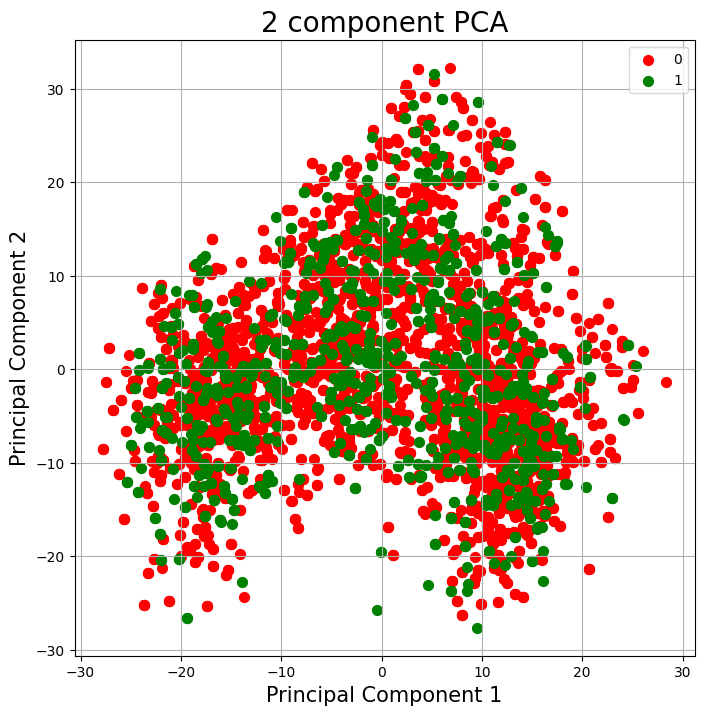

In [100]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd


# Separate the features and the target
X = df.drop('lung_cancer', axis=1)  # Features
y = df['lung_cancer']  # Target

X.columns = X.columns.astype(str)

# Standardizing the features
X = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Concatenating the target variable for visualization
finalDf = pd.concat([principalDf, df[['lung_cancer']]], axis=1)

# Plotting
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]  # Assuming 0 and 1 are the target classes
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['lung_cancer'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


# Separate the features and the target
X = df.drop(['lung_cancer', 'patient_id'], axis=1)  # Features
y = df['lung_cancer']  # Target

X.columns = X.columns.astype(str)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Support Vector Classifier
classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1217   92]
 [ 202  216]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1309
           1       0.70      0.52      0.60       418

    accuracy                           0.83      1727
   macro avg       0.78      0.72      0.74      1727
weighted avg       0.82      0.83      0.82      1727



In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

# Separate the features and the target
X = df.drop(['lung_cancer', 'patient_id'], axis=1)  # Features
y = df['lung_cancer']  # Target

X.columns = X.columns.astype(str)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1289   20]
 [ 128  290]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1309
           1       0.94      0.69      0.80       418

    accuracy                           0.91      1727
   macro avg       0.92      0.84      0.87      1727
weighted avg       0.92      0.91      0.91      1727

